## Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM»

### Этапы работы:

- Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [210]:
df = pd.read_csv('adult.csv')
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- Проведите первичный анализ.

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Из приведенных данных можно сделать вывод, что датасет содержит множество различных признаков человека по результам данных переписи населения, в том числе доход income как целевой признак. Поэтому вижу задачу как определение наиболее релевантной зависимости дохода человека от других признаков и предсказание возможного дохода по их набору

- Проверьте данные на пропуски. Удалите в случае обнаружения.

Для очистки датафрейма от строк, у которых есть пропущенные признаки, воспользуемся методом Dataframe.dropna, с той лишь поправкой, что нам нужно предварительно заменить признаки, в которые записан знак вопроса "?", на None.

In [212]:
df.replace(['?'], [None], inplace=True)
df.dropna(inplace=True)
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


- *Предложите альтернативный способ работы с пропусками

Проверим, сколько данных мы потеряли в результате удаления пропусков

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Таким образом, мы потеряли менее 8% данных, и наша выборка осталась вполне репрезентативной, ей можно пользоваться для моделирования. Однако, если для нас было бы важным использовать все имеющиеся данные для анализа, можно было поступить иначе. Вариант 1 - вместо пропусков вставляем некоторые дефолтные значения, например, строку "не определено". Недостатком такого подхода было бы появление большего числа комбинаций признаков с учетом этих дефолтных значений и усложенение моделирования, но при этом мы получили бы максимально подробную статистическую выборку исходных данных. В этом случае мы максимально подробно промоделировали бы любые возможные комбинации признаков из выборки, не потеряв никаких значимых данных. Вариант этот будет полезен, если для нас важно не потерять никакую статистику - даже самую незначительную. Но это усложнит модель и приведет к дополнительным издержкам. Если выборка достаточно большая, процент потерь на строках с пустым значением невелик, и риск потери малозначительных и маловлияющих на модель комбинаций признаков неважен - то оптимальнее будет сделать так, как сделали мы - удалить неполные строки. Вариант 2 - в методе df.dropna указываем дополнительный параметр, вынуждаеющий его удалять не строку с пропусками, а колонку - df.dropna(axis='columns', inline=True). Это приведет к тому, что мы сохраним все строки для модели, но при этом потеряем колонки, для который есть хотя бы одна строка с незаполненными данными. Модель будет учитывать влияние на доход меньшего числа признаков человека, поэтому такой подход будет допустим, если анализ по данным признакам для нас вообще не важен, модель будет упрощена, но статистика по действительно значимым для нас признакам не потеряется.

- Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

Влияние образования на доход - здесь мы видим, что любой вариант образования может дать доход как выше нашего порога, так и ниже его, и такой график не даст нам существенной информации. График имеет такой вид, потому что я привел значения видов образования к набору кодирующих чисел.

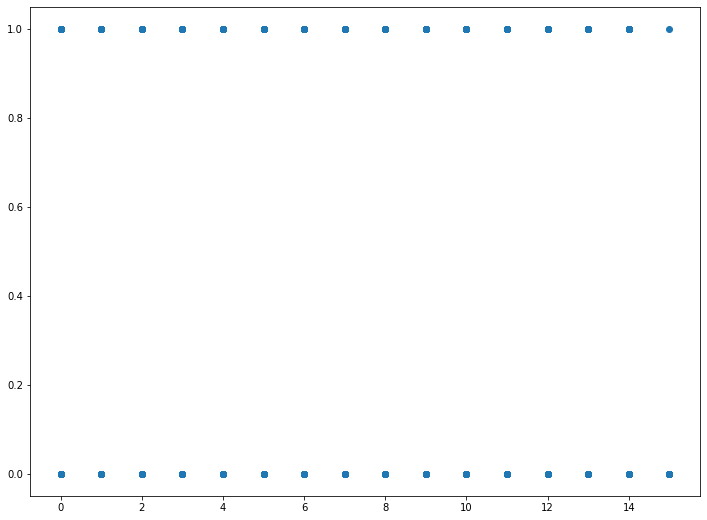

In [207]:
plt.figure(figsize=(12,9))
educations = df['education'].unique()
X = df[['education']]
X = X.replace({educations[idx]: idx for idx in range(educations.size)})
Y = df[df.columns[-1]]
plt.plot(X.values, Y.values, 'o')
plt.show()

Влияние возраста на доход - также мы видим, что строго распределения дохода по возрастам нет, такой график тоже даст мало пользы. И единственная польза от всех таких графиков состоит в том, что на основании их мы должны сделать вывод, что нам нужен более сложное моделирование, чем мы и займемся

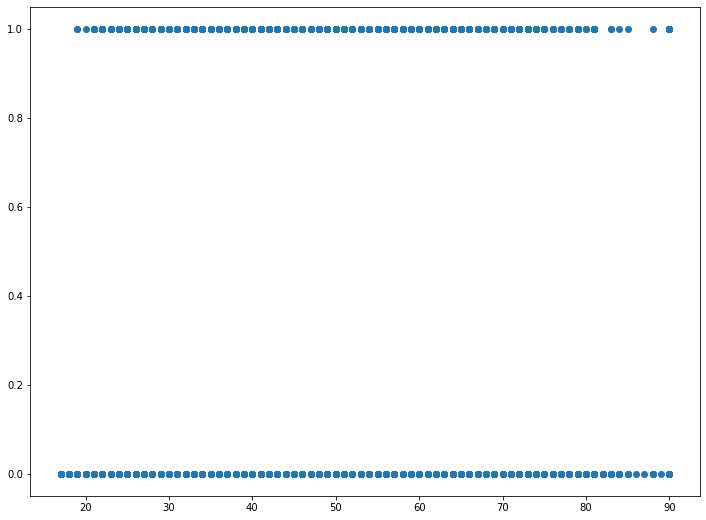

In [208]:
plt.figure(figsize=(12,9))
age = df['age']
X = df[['age']]
Y = df[df.columns[-1]]
plt.plot(X.values, Y.values, 'o')
plt.show()

In [123]:
selectedColumns_1 = df[['age', 'education', 'gender']]
selectedColumns_2 = df.loc[:, df.columns != 'income']

Список всех категориальных признаков в нашем датафрейме:

In [124]:
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [125]:
X1 = pd.get_dummies(selectedColumns_1, columns=['education', 'gender'])
X2 = pd.get_dummies(selectedColumns_2, columns=cat_columns)
y1 = df[df.columns[-1]]
y2 = df[df.columns[-1]]

Для удобства преобразуем целевой признак в бинарный вид

In [126]:
y1.replace('>50K', 1, inplace=True)
y2.replace('>50K', 1, inplace=True)
y1.replace('<=50K', 0, inplace=True)
y2.replace('<=50K', 0, inplace=True)

- Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [127]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, stratify=y1)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, stratify=y2)

- Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

Обучим модель логистической регрессии для первого варианта

In [131]:
l_model_1 = LogisticRegression(max_iter=1000)
l_model_1.fit(X1_train, y1_train)

LogisticRegression(max_iter=1000)

Обучим модель логистической регрессии для второго варианта

In [132]:
l_model_2 = LogisticRegression(max_iter=1000)
l_model_2.fit(X2_train, y2_train)

LogisticRegression(max_iter=1000)

Обучим модель опорных векторов для первого варианта

In [133]:
clf_model_1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_model_1.fit(X1_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Обучим модель опорных векторов для второго варианта

In [134]:
clf_model_2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_model_2.fit(X2_train, y2_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

- Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

Вариант 1 для логистической регрессии

In [135]:
l_predictions_1 = l_model_1.predict(X1_val)

In [136]:
l_model_1.score(X1_train, y1_train)

0.7903087597092076

In [137]:
l_model_1.score(X1_val, y1_val)

0.7897180762852405

Вариант 2 для логистической регрессии

In [139]:
l_predictions_2 = l_model_2.predict(X2_val)

In [140]:
l_model_2.score(X2_train, y2_train)

0.7916908533045858

In [141]:
l_model_2.score(X2_val, y2_val)

0.7908236594803759

Вариант 1 для опорных векторов

In [142]:
clf_predictions_1 = clf_model_1.predict(X1_val)

In [143]:
clf_model_1.score(X1_train, y1_train)

0.7978273488680654

In [144]:
clf_model_1.score(X1_val, y1_val)

0.7944720840243228

Вариант 2 для опорных векторов

In [145]:
clf_predictions_2 = clf_model_2.predict(X2_val)

In [146]:
clf_model_2.score(X2_train, y2_train)

0.8583906902175416

In [147]:
clf_model_2.score(X2_val, y2_val)

0.8424543946932007

- Сформулируйте выводы по проделанной работе.
- Кратко опишите какие преобразования были сделаны с данными.
- Сравните точность двух моделей.
- Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?

Общие выводы:
1) прежде всего, я сделал 4 варианта, больше, чем требовалось, чтобы сравнить не только два метода между собой, но и успешность применения каждого метода в зависимости от количества моделируемых исходных признаков
2) для логистической регрессии увеличение количества исходных признаков в модели не приводит к значительному улучшению предсказаний, если изначально выбирать для моделирования незначительное число "удачных" признаков - действительно сильно влияющих на результат предсказания
3) для опорных векторов ситуация несколько интереснее - увеличение числа признаков все-таки заметно улучшает предсказание, вывод - чувствительность этого метода при некоторых условиях может быть и лучше, чем у логистической регрессии
4) в целом не вызывает сомнения, что результаты моделирования и предсказания сильно зависят от действительной реальности - то есть от предоставленного датасета признаков и целевого признака. Все это - отражение действительно существующих взаимозависимостей этих показателей. И зависимости могут быть разными для разных объектов реальности. Поэтому выводы предыдущих пунктов, которые я сделал, строго говоря, применимы только для данного избранного датасета. В других случаях нужно играть с моделями и подбирать наиболее адекватные по сочетанию результативности и затрат ресурсов на модель.

При работе с данными были выполнены следующие операции - загрузка из файла в формате csv в датафрейм pandas, очистка датафрейма от пропусков, преобразование категориальных признаков методом get_dummies(), кастомное преобразование целевого признака в бинарный вид, разделение выборок на два подмножества - тренировочное и проверочное

В целом точность метода опорных векторов оказалась несколько выше, но как я уже писал, это не обязательно будет так на других датасетах

Результат предсказания, как мне кажется, неплохой, с задачей модели справились. Для улучшения результата можно, как я думаю, использовать два метода: 1) брать для обучения еще более репрезентативную выборку с большим количеством данных и 2) пытаться комбинировать разные наборы выбранных для моделирования полей, от которых может зависет целевой признак, причем совершенно не обзятельно, что наибольшее кол-во полей приведет к лучшему результату, они могут, наоборот, создавать больше шума и искажать зависимости 3) можно также варьировать применение разных методов моделирования, как логической регрессии или метода опорных векторов, так и других, которые есть в библиотеке sklearn